In [19]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np

from deepxde.backend import tf
import matplotlib.pyplot as plt
D = 3.8e-11 #m^2/s
C0 = 0.0 #moles/m^3
C1 = 100 #moles/m^3
l = 0.05 #m
def pde(x, y):
   
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
  
    return (dy_t- D*dy_xx)

def f(x):
    return np.sin(np.pi * x / l)
    
def func(x):
    n_terms = 10  # Number of terms in the series to approximate the solution
    result = C0 + (x[:, 0:1] / l) * (C1 - C0)
    for n in range(1, n_terms + 1):
        from scipy.integrate import quad
        integral, _ = quad(lambda x: f(x) * np.sin(n * np.pi * x / l), 0, l)
        cn = (2 / l) * integral + (2 / (n * np.pi)) * ((-1)**n * (C1 - C0))  
        term = cn * np.exp(-n**2 * np.pi**2 * D * x[:, 1:2] / l**2) * np.sin(n * np.pi * x[:, 0:1] / l)
        result += term
    return result



geom = dde.geometry.Interval(0, 0.05)
timedomain = dde.geometry.TimeDomain(0, 6.5e7)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, func, lambda _, on_initial: on_initial)

data = dde.data.TimePDE(geomtime, pde, [ic , bc], num_domain=40, solution=func, num_test=10000)

layer_size = [2] + [30] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)


model = dde.Model(data, net)

model.compile("adam", lr=0.01, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

C:\Users\yesda\AppData\Local\Temp\ipykernel_33776\2313764380.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(lambda x: f(x) * np.sin(n * np.pi * x / l), 0, l)
C:\Users\yesda\AppData\Local\Temp\ipykernel_33776\2313764380.py:26: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(lambda x: f(x) * np.sin(n * np.pi * x / l), 0, l)


Compiling model...
Building feed-forward neural network...
'build' took 0.095884 s



c:\Users\yesda\anaconda3\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.836504 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [0.00e+00]    [0.00e+00]    [9.97e-01]    
1000      [0.00e+00]    [0.00e+00]    [9.97e-01]    
2000      [0.00e+00]    [0.00e+00]    [9.97e-01]    
3000      [0.00e+00]    [0.00e+00]    [9.97e-01]    
4000      [0.00e+00]    [0.00e+00]    [9.97e-01]    
5000      [0.00e+00]    [0.00e+00]    [9.97e-01]    
6000      [0.00e+00]    [0.00e+00]    [9.97e-01]    
7000      [0.00e+00]    [0.00e+00]    [9.97e-01]    
8000      [0.00e+00]    [0.00e+00]    [9.97e-01]    
9000      [0.00e+00]    [0.00e+00]    [9.97e-01]    
10000     [0.00e+00]    [0.00e+00]    [9.97e-01]    

Best model at step 0:
  train loss: 0.00e+00
  test loss: 0.00e+00
  test metric: [9.97e-01]

'train' took 24.885941 s



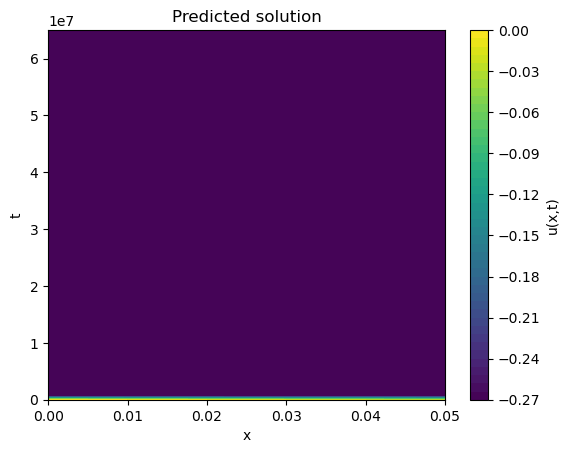

In [15]:
import matplotlib.pyplot as plt

# Create a grid of points to evaluate the solution
x = np.linspace(0, 0.05, 100)
t = np.linspace(0, 6.5e7, 100)
X, T = np.meshgrid(x, t)
points = np.vstack([X.ravel(), T.ravel()]).T

# Predict the solution at these grid points
y_pred = model.predict(points).reshape(X.shape)

# Plot the solution
plt.contourf(X, T, y_pred, levels=50, cmap='viridis')
plt.colorbar(label='u(x,t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Predicted solution')
plt.show()


In [ ]:
# Define points where you want to evaluate the solution
points = np.array([[0.5, 0.5], [-0.5, 0.5]])  # Example points (x, t)

# Use the trained model to predict the solution at these points
y_pred = model.predict(points)
print("Predicted solution at points:", y_pred)